__Title:__ Case Study 2: Logistic Regression  
__Authors:__ Will Butler, Robert (Reuven) Derner 
__Date:__ 9/18/23 

## Business Understanding & Ethical Concerns

The medical community has asked us to examine a study conducted over the past 10 years with patients whom have diabeties. The case study presented to us is to be addressing hospitial readmission rates to minimize patients returning and predict whether a patient will return within 30 days of initial hospitalizaiton. Readmission is a costly endevaor to the hospitial, insurance providers, and to the patients themselves between bills, lost wages, & strain on their respective families. 
 
There is some ethical considering contained within the dataset. We have identified a race category. Given the context of what the results of this study is to be used for would determine the best practice whether to include the feature or to remove it before proceeding with the analysis. Using the feature could be seen as a racial biased in regard to readmittance rates based on what is uncovered. In the case of the study just being utilized by hospitial personal to better treat and forecast patients I would rather have more information than less and would utilize the additional feature. On the other hand, if the catgory is to be used by thrird party vendors for instance, insurance agencies then I would prefer to remove the data point before proceeding with the case study. 

Data Source:

Provided by client with metadata dictionary regarding terms 

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import random
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio 
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix



# Workbook settings
pd.set_option('display.max_columns', None)
random.seed(110)
pio.renderers.default='notebook'

In [2]:
# Import data from github (next phase)
url = 'https://raw.githubusercontent.com/ReuvenDerner/MSDS_QuantifyingTheWorld/main/diabetic_data.csv'
dia_data_df = pd.read_csv(url, encoding = "utf-8")

In [3]:
# loacal Import (To be removed later)
#data = pd.read_csv("C:/Users/robert.derner/OneDrive - Flagship Credit Acceptance/Documents/School/Quantifying The World/Case Study Two/diabetic_data.csv")
id_data_maps = pd.read_csv("IDs_mapping.csv")

## Data Quality
Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

In [4]:
dia_data_df.shape

(101766, 50)

In [5]:
id_data_maps.shape

(67, 2)

### Examine the data

In [6]:
dia_data_df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
id_data_maps.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


__Missing Values__  
The dataset contains no missing values upon code examination, however there are many "?" contained within the dataset that would indicate missing values. We will have to look more closely at the features to examine the degree of missing data we will need. 

For the purposes of classification on the readmittance, we need to investigate further.

In [8]:
# Features with Null Values and Percent missing
null_df = pd.DataFrame(dia_data_df[dia_data_df.columns[dia_data_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / dia_data_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


In [9]:
# Replace "?" with Nulls
dia_data_df.replace("?", np.nan, inplace =True)

In [10]:
# Recheck Nulls
null_df = pd.DataFrame(dia_data_df[dia_data_df.columns[dia_data_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / dia_data_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent
0,race,2273,2.23
1,weight,98569,96.86
2,payer_code,40256,39.56
3,medical_specialty,49949,49.08
4,diag_1,21,0.02
5,diag_2,358,0.35
6,diag_3,1423,1.40


After replacing the missing "?"'s with nulls we have a better look at the distribution of missing data across the data. We observe that weight has nearily all of the data missing from the feature, we may as well remove this feature as impuation would be heavily biased if we were to guess a value. The three different diagonsis features we should make sure we one hot encode as there might not be multiple diagnosis per patient. Medicial speciality is not a column where we have metadata for so this may be a feature we decide to imputate, however it is nearly halfway missing so that may be difficult and we could introduce additional biasis into the data. Payer code & race are other columns in which we do not have metadata look up on so these would also be candiates for impuation. We will have to examin each column and see if a pattern emerges with the data. 

__Duplicate Values__  
There are 0 duplicate values in the data set. No action was needed.

In [11]:
# Duplicate record validation
dia_data_df.duplicated().sum()

0

#### Explore missing values and response variable

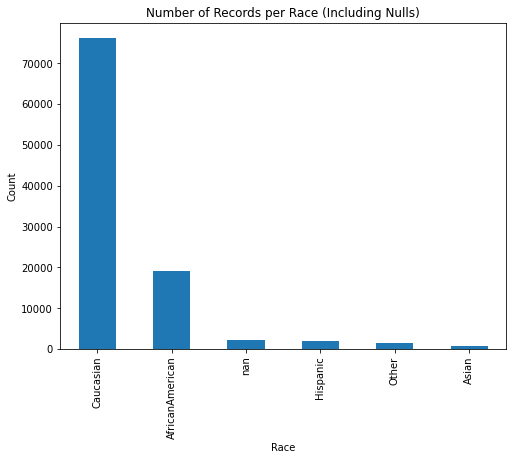

In [12]:
# Create a bar plot using Matplotlib, including null values
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
dia_data_df['race'].value_counts(dropna=False).plot(kind='bar')
plt.title('Number of Records per Race (Including Nulls)')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


In [13]:
# Get the count of each category, including null values
race_category_counts = dia_data_df['race'].value_counts(dropna=False)
race_category_percentages = (race_category_counts / race_category_counts.sum())*100

#Create a DF to display both counts and percentages
race_df = pd.DataFrame({'Count': race_category_counts, 'Percentage': race_category_percentages})

# Display the result
print(race_df)


                 Count  Percentage
Caucasian        76099   74.778413
AfricanAmerican  19210   18.876639
NaN               2273    2.233555
Hispanic          2037    2.001651
Other             1506    1.479866
Asian              641    0.629876


We can observe that the vast majority of the patientes within the study are of caucasian, with a little over 2.2% are nulls, we may be able to imputate with caucasian, with the next highest patients observed would be those of African American decesent. The rest of the population is very limited across the study.

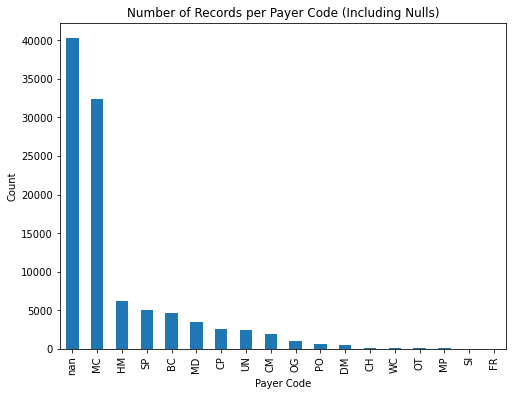

In [14]:
# Create a bar plot using Matplotlib, including null values
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
dia_data_df['payer_code'].value_counts(dropna=False).plot(kind='bar')
plt.title('Number of Records per Payer Code (Including Nulls)')
plt.xlabel('Payer Code')
plt.ylabel('Count')
plt.show()

In [15]:
# Get the count of each category, including null values
payer_category_counts = dia_data_df['payer_code'].value_counts(dropna=False)
payer_category_percentages = (payer_category_counts / payer_category_counts.sum())*100

#Create a DF to display both counts and percentages
payer_df = pd.DataFrame({'Count': payer_category_counts, 'Percentage': payer_category_percentages})

# Display the result
print(payer_df)

     Count  Percentage
NaN  40256   39.557416
MC   32439   31.876069
HM    6274    6.165124
SP    5007    4.920111
BC    4655    4.574219
MD    3532    3.470707
CP    2533    2.489043
UN    2448    2.405519
CM    1937    1.903386
OG    1033    1.015074
PO     592    0.581727
DM     549    0.539473
CH     146    0.143466
WC     135    0.132657
OT      95    0.093351
MP      79    0.077629
SI      55    0.054046
FR       1    0.000983


More than half of the feature is missing data, imputation may not be feesable here

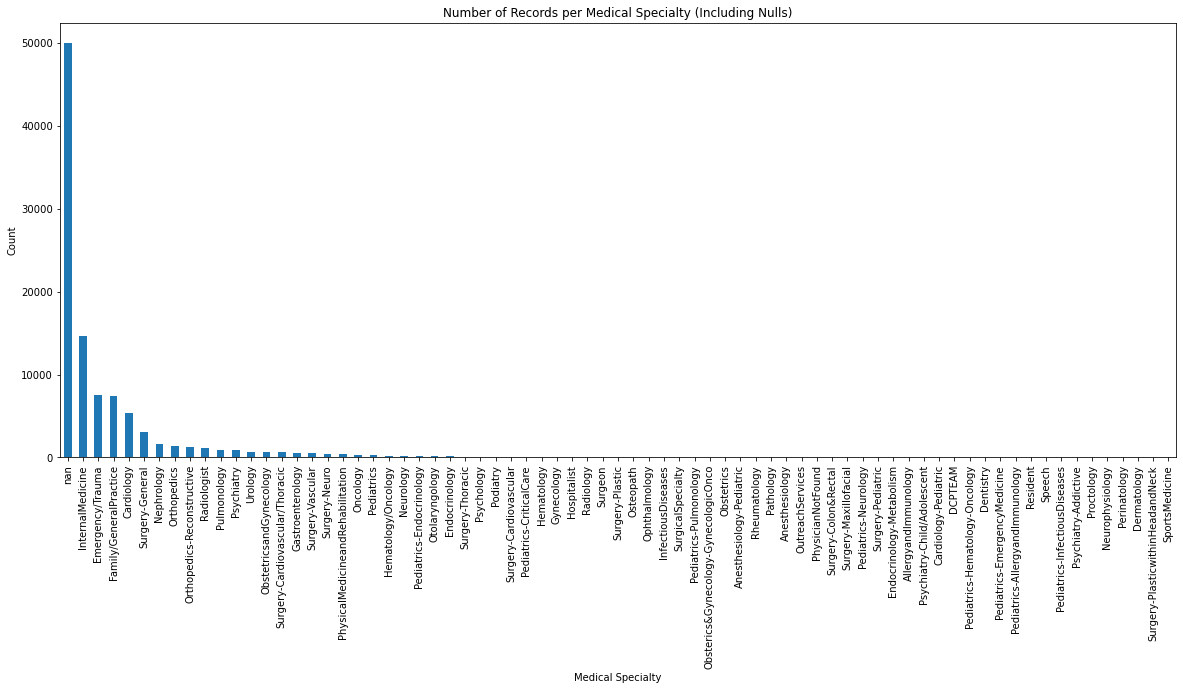

In [16]:
# Create a bar plot using Matplotlib, including null values
plt.figure(figsize=(20, 8))  # Optional: Set the figure size
dia_data_df['medical_specialty'].value_counts(dropna=False).plot(kind='bar')
plt.title('Number of Records per Medical Specialty (Including Nulls)')
plt.xlabel('Medical Specialty')
plt.ylabel('Count')
plt.show()

In [17]:
# Get the count of each category, including null values
med_category_counts = dia_data_df['medical_specialty'].value_counts(dropna=False)
med_category_percentages = (med_category_counts / med_category_counts.sum())*100

#Create a DF to display both counts and percentages
med_df = pd.DataFrame({'Count': med_category_counts, 'Percentage': med_category_percentages})

# Display the result
print(med_df)

                                  Count  Percentage
NaN                               49949   49.082208
InternalMedicine                  14635   14.381031
Emergency/Trauma                   7565    7.433720
Family/GeneralPractice             7440    7.310890
Cardiology                         5352    5.259124
...                                 ...         ...
Neurophysiology                       1    0.000983
Perinatology                          1    0.000983
Dermatology                           1    0.000983
Surgery-PlasticwithinHeadandNeck      1    0.000983
SportsMedicine                        1    0.000983

[73 rows x 2 columns]


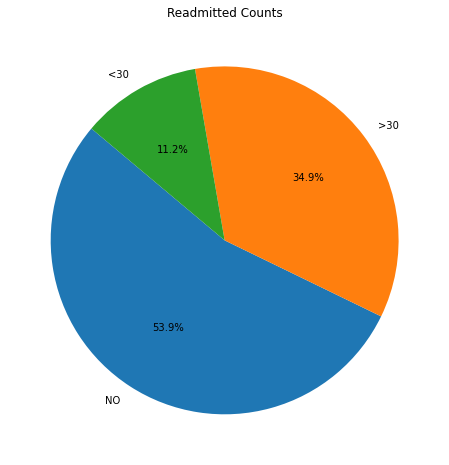

In [18]:
# Get the count of each category, including null values
category_counts = dia_data_df['readmitted'].value_counts(dropna=False)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Optional: Set the figure size
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Readmitted Counts')
plt.show()

We observe that over half of the paitents who were part of the study were not readmitted while 

__Data Type Conversion__  
In this section we grouped all features by their correct data type and converted each to their coresponding group. This facilitates a much easier analysis into the statistics of each feature type.

In [19]:
# Features grouped by data type
# cat_features = ['number_of_elements']
# cont_features = ['mean_atomic_mass','wtd_mean_atomic_mass','gmean_atomic_mass','wtd_gmean_atomic_mass',
#                 'entropy_atomic_mass','wtd_entropy_atomic_mass','range_atomic_mass','wtd_range_atomic_mass','std_atomic_mass',
#                 'wtd_std_atomic_mass','mean_fie', 'wtd_mean_fie','gmean_fie','wtd_gmean_fie','entropy_fie','wtd_entropy_fie',
#                 'range_fie','wtd_range_fie','std_fie','wtd_std_fie','mean_atomic_radius','wtd_mean_atomic_radius',
#                 'gmean_atomic_radius','wtd_gmean_atomic_radius','entropy_atomic_radius','wtd_entropy_atomic_radius',
#                 'range_atomic_radius','wtd_range_atomic_radius','std_atomic_radius','wtd_std_atomic_radius','mean_Density',
#                 'wtd_mean_Density','gmean_Density','wtd_gmean_Density','entropy_Density','wtd_entropy_Density','range_Density',
#                 'wtd_range_Density','std_Density','wtd_std_Density','mean_ElectronAffinity','wtd_mean_ElectronAffinity',
#                 'gmean_ElectronAffinity','wtd_gmean_ElectronAffinity','entropy_ElectronAffinity','wtd_entropy_ElectronAffinity',
#                 'range_ElectronAffinity','wtd_range_ElectronAffinity','std_ElectronAffinity','wtd_std_ElectronAffinity',
#                 'mean_FusionHeat','wtd_mean_FusionHeat','gmean_FusionHeat','wtd_gmean_FusionHeat','entropy_FusionHeat',
#                 'wtd_entropy_FusionHeat','range_FusionHeat','wtd_range_FusionHeat','std_FusionHeat','wtd_std_FusionHeat',
#                 'mean_ThermalConductivity','wtd_mean_ThermalConductivity','gmean_ThermalConductivity',
#                 'wtd_gmean_ThermalConductivity','entropy_ThermalConductivity','wtd_entropy_ThermalConductivity',
#                 'range_ThermalConductivity','wtd_range_ThermalConductivity','std_ThermalConductivity',
#                 'wtd_std_ThermalConductivity','mean_Valence','wtd_mean_Valence','gmean_Valence','wtd_gmean_Valence',
#                 'entropy_Valence','wtd_entropy_Valence','range_Valence','wtd_range_Valence','std_Valence','wtd_std_Valence']

In [20]:
# Features converted to corresponding group type (may be interesting to convert to string)
# data[cat_features] = data[cat_features].astype("string")

## Visualize Attributes

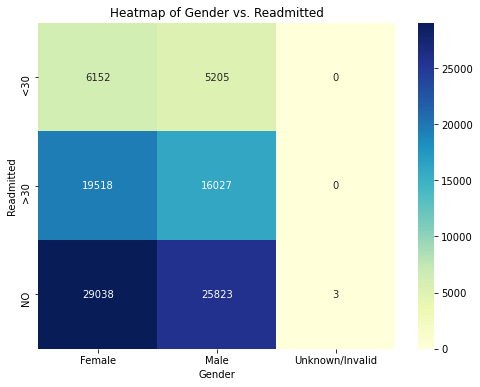

In [21]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
heatmap_data = pd.crosstab(dia_data_df['readmitted'], dia_data_df['gender'])
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Gender vs. Readmitted')
plt.xlabel('Gender')
plt.ylabel('Readmitted')
plt.show()

Above we see a heatmat analyzing the gender compared to our response variable readmitted. The study shows a distribution among the feature and our response indicating no clear pattern among genders. The few outliers we see can likely be removed from the dataset entirely prior to modeling.

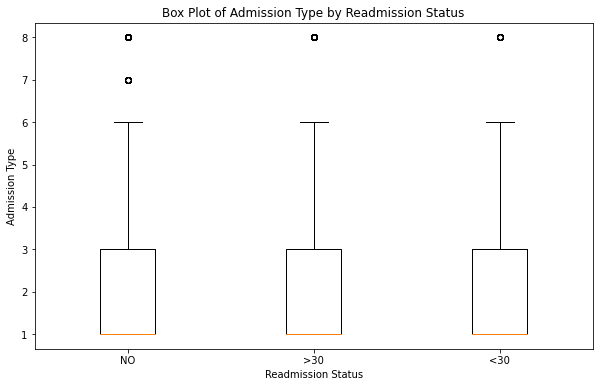

In [22]:
# Set a larger figure size
plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Create a box plot for each readmission status
boxplot_data = [dia_data_df[dia_data_df['readmitted'] == status]['admission_type_id']
               for status in dia_data_df['readmitted'].unique()]

plt.boxplot(boxplot_data, labels=dia_data_df['readmitted'].unique(), showfliers=True) 
plt.title('Box Plot of Admission Type by Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Admission Type')
plt.show()

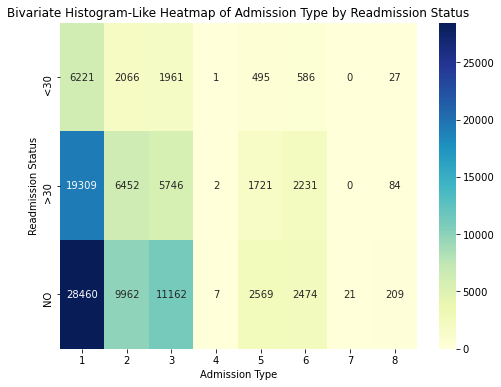

In [23]:
# Create a crosstab to calculate frequencies
cross_tab = pd.crosstab(dia_data_df['readmitted'], dia_data_df['admission_type_id'])

# Create a bivariate histogram-like heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Bivariate Histogram-Like Heatmap of Admission Type by Readmission Status')
plt.xlabel('Admission Type')
plt.ylabel('Readmission Status')
plt.show()

The box and whisker plot indicates a very uniform distribution among each of the type's of admission type ids'. There is some notable outliers among those with no readmittance from admission type 8 or Not Mapped. The bulk of the data is coming admission type 1, 2, and 3 (Emergency, Urgent, or Elective) respectively. Diving in we see a very limited population for admissions type 4, 7 & 8 (Newborns, Trauma Center, & Not Mapped). 

## Explore Correlations

In [24]:
# First step to explore any relationships between data would be to do a correlation
dia_data_df.corr()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,1.000000,0.512028,-0.158961,-0.132876,-0.112402,-0.062221,-0.026062,-0.014225,0.076113,0.103756,0.082803,0.030962,0.265149
patient_nbr,0.512028,1.000000,-0.011128,-0.136814,-0.032568,-0.024092,0.015946,-0.015570,0.020665,0.103379,0.062352,0.012480,0.226847
admission_type_id,-0.158961,-0.011128,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,-0.132876,-0.136814,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,-0.112402,-0.032568,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.062221,-0.024092,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.026062,0.015946,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,-0.014225,-0.015570,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.076113,0.020665,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.103756,0.103379,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152


### Dropping null records

In [25]:
# Before imputation, we need to impuate some of the missing data, or remove columns containing nulls 
# race
# weight
# payer_code
# medical_specialty
# diag_1
# diag_2
# diag_3

# List of columns to drop for purposes of correlation 
columns_to_drop = ['weight', 'medical_specialty','payer_code']

# Drop the specified columns
refined_df = dia_data_df.drop(columns=columns_to_drop)

### Imputation

In [26]:
imp_df = refined_df

In [27]:
# for imputation on new df
fill_value_race = 'Caucasian'
fill_value_diag1 = '?'
fill_value_diag2 = '?'
fill_value_diag3 = '?'

imp_df['race'].fillna(fill_value_race, inplace=True)
imp_df['diag_1'].fillna(fill_value_diag1, inplace=True)
imp_df['diag_2'].fillna(fill_value_diag2, inplace=True)
imp_df['diag_3'].fillna(fill_value_diag3, inplace=True)

In [28]:
imp_df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [29]:
# Recheck Nulls
null_df = pd.DataFrame(imp_df[imp_df.columns[imp_df.isnull().any()]].isnull().sum()).reset_index()
null_df.columns = ['Feature', 'Value']
null_df['Percent'] = round((null_df['Value'] / imp_df.shape[0] * 100),2)

null_df

,Feature,Value,Percent


all nulls have been removed from the dataset

### Encoding

In [30]:
# Perform one-hot encoding
encoded_df = pd.get_dummies(imp_df, columns=['race','gender','age','admission_type_id','discharge_disposition_id',
                                                  'admission_source_id',
                                             #'payer_code','medical_specialty', 'weight',''
                                                  'num_lab_procedures','num_procedures','num_medications','number_outpatient',
                                                  'number_emergency','number_inpatient','diag_1','diag_2','diag_3',
                                                  'number_diagnoses','max_glu_serum','A1Cresult','metformin','repaglinide',
                                                  'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
                                                  'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose',
                                                  'miglitol','troglitazone','tolazamide','examide','citoglipton','insulin',
                                                  'glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
                                                  'metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed',
                                                  'readmitted'])

In [ ]:
# First step to explore any relationships between data would be to do a correlation
correlations = encoded_df.corr()

In [ ]:
correlations

After one hot enconding we transformed the dataset to 2723 features from 49 features and one target variable.

In [ ]:
# Set the correlation threshold
correlation_threshold = 0.10

# Create a list to store DataFrames for significant correlations
significant_correlations = []

# Iterate through all features
for feature in encoded_df.columns:
    if feature.startswith('readmitted_'):
        continue  # Skip target variables
    
    # Filter correlations for the current feature
    feature_correlations = correlations[feature]
    filtered_correlations = feature_correlations[
        (feature_correlations.index.str.startswith('readmitted_')) & (abs(feature_correlations) >= correlation_threshold)
    ]

    # Create a DataFrame for significant correlations
    feature_results = pd.DataFrame({'Feature': [feature] * len(filtered_correlations.index),
                                    'Target Variable': filtered_correlations.index,
                                    'Correlation': filtered_correlations.values})
    
    # Append to the list of significant_correlations DataFrames
    significant_correlations.append(feature_results)

# Concatenate all DataFrames in the list
result_df = pd.concat(significant_correlations, ignore_index=True)

# Display the significant correlations as a table
print(result_df)

The correlation matrix towards the target variables indicate weak correlations across the board with the highest correlation among the features being number_inpatient_0 to readmitted_No target variable at 0.2144 indicating that if a patient is not inpatient then they are more likely not to be readmiatted to the hospitable. We see an inverse relationship between the other two target variables and number_inpatient_0 reinforcing the previous observation that if not an inpatient then unlikely to be readmitted. For disposition_id_11 or an Expired the patient is likely to not be readmitted. 

### Examine the correlations among the features


In [ ]:
#set the correlation threshold
threshold = 0.90

#Create empty lists to store strong relationships 
strong_pos_corr = []
strong_neg_corr = []

# Iterate through the correlation matrix
for feature1 in correlations.columns:
    for feature2 in correlations.index:
        if feature1 !=feature2: # Avoid comparing a feature with itself
            corr_value = correlations.loc[feature2, feature1]
            if corr_value > threshold:
                strong_pos_corr.append((feature2, feature1, corr_value))
            elif corr_value < -threshold:
                strong_neg_corr.append((feature2, feature1, corr_value))

                
# Sort the correlations alphabetically
strong_pos_corr.sort()
strong_neg_corr.sort()
                
# Format results as table
pos_table = tabulate(strong_pos_corr, headers=["Feature 1", "Feature 2", "Correlation"], tablefmt="grid")
neg_table = tabulate(strong_neg_corr, headers=["Feature 1", "Feature 2", "Correlation"], tablefmt="grid")

#Display strong pos correlations
print("Strong Positive Correlations:")
print(pos_table)

print()

#Display strong pos correlations
print("Strong Negative Correlations:")
print(neg_table)
   

From the correlation table, we can see that the certain diagnosis have a perfect correlation to a 2nd & 3rd diagnosis. Indicating that if a patient has been diagnosised with 10 they will also be diagnosied with 14.  Simultanseoulsy, if the first diagnosis of 98 the second will be 99. Should the second diagnosis be 947 then the third will be E861. This trend continues with other perfectly correlated feature pairs. To note on negatively correlated features, only those that are among the same original categorical feature are inversely correlated to one another. If diabetesMed_No is marked then diabetesMed_Yes will not be marked. This associating continues among other features. 

## Explore Attributes and Class
Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In this section we want to explore the relationship of minutes delayed when grouping by airline, month, and day of the month. Until we complete the regression and classification portion of our analysis, we won't be able to give hard numbers into the weight of each of these categorical variables. However, this section can show us some fast information about airlines, months, or days of the month to avoid flying.

# Modeling

In [ ]:
##Multi-Nomial Regression with Distance Group/ EXCEPTIONAL WORK
#encoded_df

# Create a target variable with three levels: 0, 1, and 2
encoded_df['target'] = encoded_df['readmitted_<30'].astype(int) + encoded_df['readmitted_>30'].astype(int) * 2


#split the data into features x and features y
x = encoded_df.drop(columns=['readmitted_<30', 'readmitted_>30', 'readmitted_NO'])
y = encoded_df[['target']]

#split the dataset into train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Reshape y_train and y_test
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


In [ ]:
# create the model the model
model = LogisticRegression(multi_class='multinomial')

In [ ]:
# create hyperparamater grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],  # Inverse of regularization strength
}

In [ ]:
#preform the grid search
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=2, n_jobs=-1)

grid_search.fit(x_train,y_train)


# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:")
print(best_params)

In [ ]:
# Get the best model from the grid search
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_logistic_regression_model.predict(x_test)

In [ ]:
# Evaluate the model
classification_report_result = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report_result)

From the output above we can see the logistic regression for classifying Distance group is highly accurate. Looking at the Confusion Matrix below, we see there is a difference not only with the implementation of K-Fold Cross Validation, but also with the addition of the L2 Penalty. We are more confident in the models without the L2 penalty as these classify more accurately as well as provide enough room to provide post model adjustments if need be. This is our first attempt at modeling with our Flight dataset and in the future will bring about more robust methods to our modeling. Upon further review of the model, there are many more directions available for us to entertain, but would require a more in depth understanding of modeling within Pandas.

In [89]:
print(y_train[y_train == 1].count)

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [90]:
# Convert y_train and y_test to pandas Series (assuming they are numpy arrays)
y_train_series = pd.Series(y_train.ravel())
y_test_series = pd.Series(y_test.ravel())

# Count the occurrences of each value and get the count for 1
count_train = y_train_series.value_counts().get(1, 0)
count_test = y_test_series.value_counts().get(1, 0)

print("Number of 1s in y_train:", count_train)
print("Number of 1s in y_test:", count_test)

Number of 1s in y_train: 8993
Number of 1s in y_test: 2364
